In [49]:
%matplotlib inline
from fastai import *
from matplotlib import pyplot as plt

In [52]:
n=100
x = torch.ones(n,2)
x[:,0] = x[:,0].uniform_(-1,1)

# creating x and y (ground truth data)
a = torch.tensor([2.,5.])
y_true = x@a + torch.rand(n)

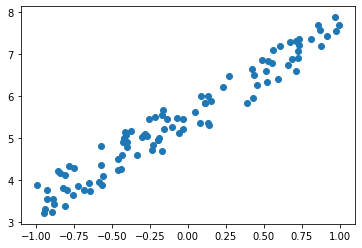

In [54]:
plt.scatter(x[:,0], y_true);

In [55]:
def mse(y_pred, y_true): 
    return ((y_pred-y_true)**2).mean()

In [58]:
w = torch.tensor([-1.,1])
w

tensor([-1.,  1.])

In [47]:
y_pred = x@w
mse(y_pred, y)